<a href="https://colab.research.google.com/github/Ahtesham519/jupyter-notebook_python/blob/main/Anamoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

anamoly detection 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.ensemble import IsolationForest

In [4]:
#useful in beautifing numpy arrays.

from IPython.display import HTML, display
import tabulate
def pp(a, show_head =True):
  '''
  args:show_head -> if true print only first 5 rows.
  return: none
  '''
  if a.ndim < 2:
    a = [a]
  if show_head:
    display(HTML(tabulate.tabulate(a[:5] , tablefmt='html')))
    return
  display(HTML(tabulate.tabulate(a, tablefmt = 'html')))

In [5]:
coordinates_vector1 = np.linspace(-7 , 7 , 150)
print('coordinates_vector1: ')
pp(coordinates_vector1)
coordinates_vector2 = np.linspace(-7, 7 , 150)
print('coordinates_vector2: ')
pp(coordinates_vector2)

coordinates_vector1: 


-7,-6.90604,-6.81208,-6.71812,-6.62416,-6.5302,-6.43624,-6.34228,-6.24832,-6.15436,-6.0604,-5.96644,-5.87248,-5.77852,-5.68456,-5.5906,-5.49664,-5.40268,-5.30872,-5.21477,-5.12081,-5.02685,-4.93289,-4.83893,-4.74497,-4.65101,-4.55705,-4.46309,-4.36913,-4.27517,-4.18121,-4.08725,-3.99329,-3.89933,-3.80537,-3.71141,-3.61745,-3.52349,-3.42953,-3.33557,-3.24161,-3.14765,-3.05369,-2.95973,-2.86577,-2.77181,-2.67785,-2.58389,-2.48993,-2.39597,-2.30201,-2.20805,-2.11409,-2.02013,-1.92617,-1.83221,-1.73826,-1.6443,-1.55034,-1.45638,-1.36242,-1.26846,-1.1745,-1.08054,-0.986577,-0.892617,-0.798658,-0.704698,-0.610738,-0.516779,-0.422819,-0.328859,-0.234899,-0.14094,-0.0469799,0.0469799,0.14094,0.234899,0.328859,0.422819,0.516779,0.610738,0.704698,0.798658,0.892617,0.986577,1.08054,1.1745,1.26846,1.36242,1.45638,1.55034,1.6443,1.73826,1.83221,1.92617,2.02013,2.11409,2.20805,2.30201,2.39597,2.48993,2.58389,2.67785,2.77181,2.86577,2.95973,3.05369,3.14765,3.24161,3.33557,3.42953,3.52349,3.61745,3.71141,3.80537,3.89933,3.99329,4.08725,4.18121,4.27517,4.36913,4.46309,4.55705,4.65101,4.74497,4.83893,4.93289,5.02685,5.12081,5.21477,5.30872,5.40268,5.49664,5.5906,5.68456,5.77852,5.87248,5.96644,6.0604,6.15436,6.24832,6.34228,6.43624,6.5302,6.62416,6.71812,6.81208,6.90604,7


coordinates_vector2: 


-7,-6.90604,-6.81208,-6.71812,-6.62416,-6.5302,-6.43624,-6.34228,-6.24832,-6.15436,-6.0604,-5.96644,-5.87248,-5.77852,-5.68456,-5.5906,-5.49664,-5.40268,-5.30872,-5.21477,-5.12081,-5.02685,-4.93289,-4.83893,-4.74497,-4.65101,-4.55705,-4.46309,-4.36913,-4.27517,-4.18121,-4.08725,-3.99329,-3.89933,-3.80537,-3.71141,-3.61745,-3.52349,-3.42953,-3.33557,-3.24161,-3.14765,-3.05369,-2.95973,-2.86577,-2.77181,-2.67785,-2.58389,-2.48993,-2.39597,-2.30201,-2.20805,-2.11409,-2.02013,-1.92617,-1.83221,-1.73826,-1.6443,-1.55034,-1.45638,-1.36242,-1.26846,-1.1745,-1.08054,-0.986577,-0.892617,-0.798658,-0.704698,-0.610738,-0.516779,-0.422819,-0.328859,-0.234899,-0.14094,-0.0469799,0.0469799,0.14094,0.234899,0.328859,0.422819,0.516779,0.610738,0.704698,0.798658,0.892617,0.986577,1.08054,1.1745,1.26846,1.36242,1.45638,1.55034,1.6443,1.73826,1.83221,1.92617,2.02013,2.11409,2.20805,2.30201,2.39597,2.48993,2.58389,2.67785,2.77181,2.86577,2.95973,3.05369,3.14765,3.24161,3.33557,3.42953,3.52349,3.61745,3.71141,3.80537,3.89933,3.99329,4.08725,4.18121,4.27517,4.36913,4.46309,4.55705,4.65101,4.74497,4.83893,4.93289,5.02685,5.12081,5.21477,5.30872,5.40268,5.49664,5.5906,5.68456,5.77852,5.87248,5.96644,6.0604,6.15436,6.24832,6.34228,6.43624,6.5302,6.62416,6.71812,6.81208,6.90604,7


In [6]:
#make a grid using the coordinates vectors.

xx, yy = np.meshgrid(coordinates_vector1 , coordinates_vector2)
print('xx - elements of vector x are repeated along first dimension i.e each row has the same element .')
print('xx: ')
pp(xx)
print('yy - elements of vector y are repeated along second dimension i.e each col has the same elements. ')
print('yy:')
pp(yy)

xx - elements of vector x are repeated along first dimension i.e each row has the same element .
xx: 


-7,-6.90604,-6.81208,-6.71812,-6.62416,-6.5302,-6.43624,-6.34228,-6.24832,-6.15436,-6.0604,-5.96644,-5.87248,-5.77852,-5.68456,-5.5906,-5.49664,-5.40268,-5.30872,-5.21477,-5.12081,-5.02685,-4.93289,-4.83893,-4.74497,-4.65101,-4.55705,-4.46309,-4.36913,-4.27517,-4.18121,-4.08725,-3.99329,-3.89933,-3.80537,-3.71141,-3.61745,-3.52349,-3.42953,-3.33557,-3.24161,-3.14765,-3.05369,-2.95973,-2.86577,-2.77181,-2.67785,-2.58389,-2.48993,-2.39597,-2.30201,-2.20805,-2.11409,-2.02013,-1.92617,-1.83221,-1.73826,-1.6443,-1.55034,-1.45638,-1.36242,-1.26846,-1.1745,-1.08054,-0.986577,-0.892617,-0.798658,-0.704698,-0.610738,-0.516779,-0.422819,-0.328859,-0.234899,-0.14094,-0.0469799,0.0469799,0.14094,0.234899,0.328859,0.422819,0.516779,0.610738,0.704698,0.798658,0.892617,0.986577,1.08054,1.1745,1.26846,1.36242,1.45638,1.55034,1.6443,1.73826,1.83221,1.92617,2.02013,2.11409,2.20805,2.30201,2.39597,2.48993,2.58389,2.67785,2.77181,2.86577,2.95973,3.05369,3.14765,3.24161,3.33557,3.42953,3.52349,3.61745,3.71141,3.80537,3.89933,3.99329,4.08725,4.18121,4.27517,4.36913,4.46309,4.55705,4.65101,4.74497,4.83893,4.93289,5.02685,5.12081,5.21477,5.30872,5.40268,5.49664,5.5906,5.68456,5.77852,5.87248,5.96644,6.0604,6.15436,6.24832,6.34228,6.43624,6.5302,6.62416,6.71812,6.81208,6.90604,7
-7,-6.90604,-6.81208,-6.71812,-6.62416,-6.5302,-6.43624,-6.34228,-6.24832,-6.15436,-6.0604,-5.96644,-5.87248,-5.77852,-5.68456,-5.5906,-5.49664,-5.40268,-5.30872,-5.21477,-5.12081,-5.02685,-4.93289,-4.83893,-4.74497,-4.65101,-4.55705,-4.46309,-4.36913,-4.27517,-4.18121,-4.08725,-3.99329,-3.89933,-3.80537,-3.71141,-3.61745,-3.52349,-3.42953,-3.33557,-3.24161,-3.14765,-3.05369,-2.95973,-2.86577,-2.77181,-2.67785,-2.58389,-2.48993,-2.39597,-2.30201,-2.20805,-2.11409,-2.02013,-1.92617,-1.83221,-1.73826,-1.6443,-1.55034,-1.45638,-1.36242,-1.26846,-1.1745,-1.08054,-0.986577,-0.892617,-0.798658,-0.704698,-0.610738,-0.516779,-0.422819,-0.328859,-0.234899,-0.14094,-0.0469799,0.0469799,0.14094,0.234899,0.328859,0.422819,0.516779,0.610738,0.704698,0.798658,0.892617,0.986577,1.08054,1.1745,1.26846,1.36242,1.45638,1.55034,1.6443,1.73826,1.83221,1.92617,2.02013,2.11409,2.20805,2.30201,2.39597,2.48993,2.58389,2.67785,2.77181,2.86577,2.95973,3.05369,3.14765,3.24161,3.33557,3.42953,3.52349,3.61745,3.71141,3.80537,3.89933,3.99329,4.08725,4.18121,4.27517,4.36913,4.46309,4.55705,4.65101,4.74497,4.83893,4.93289,5.02685,5.12081,5.21477,5.30872,5.40268,5.49664,5.5906,5.68456,5.77852,5.87248,5.96644,6.0604,6.15436,6.24832,6.34228,6.43624,6.5302,6.62416,6.71812,6.81208,6.90604,7
-7,-6.90604,-6.81208,-6.71812,-6.62416,-6.5302,-6.43624,-6.34228,-6.24832,-6.15436,-6.0604,-5.96644,-5.87248,-5.77852,-5.68456,-5.5906,-5.49664,-5.40268,-5.30872,-5.21477,-5.12081,-5.02685,-4.93289,-4.83893,-4.74497,-4.65101,-4.55705,-4.46309,-4.36913,-4.27517,-4.18121,-4.08725,-3.99329,-3.89933,-3.80537,-3.71141,-3.61745,-3.52349,-3.42953,-3.33557,-3.24161,-3.14765,-3.05369,-2.95973,-2.86577,-2.77181,-2.67785,-2.58389,-2.48993,-2.39597,-2.30201,-2.20805,-2.11409,-2.02013,-1.92617,-1.83221,-1.73826,-1.6443,-1.55034,-1.45638,-1.36242,-1.26846,-1.1745,-1.08054,-0.986577,-0.892617,-0.798658,-0.704698,-0.610738,-0.516779,-0.422819,-0.328859,-0.234899,-0.14094,-0.0469799,0.0469799,0.14094,0.234899,0.328859,0.422819,0.516779,0.610738,0.704698,0.798658,0.892617,0.986577,1.08054,1.1745,1.26846,1.36242,1.45638,1.55034,1.6443,1.73826,1.83221,1.92617,2.02013,2.11409,2.20805,2.30201,2.39597,2.48993,2.58389,2.67785,2.77181,2.86577,2.95973,3.05369,3.14765,3.24161,3.33557,3.42953,3.52349,3.61745,3.71141,3.80537,3.89933,3.99329,4.08725,4.18121,4.27517,4.36913,4.46309,4.55705,4.65101,4.74497,4.83893,4.93289,5.02685,5.12081,5.21477,5.30872,5.40268,5.49664,5.5906,5.68456,5.77852,5.87248,5.96644,6.0604,6.15436,6.24832,6.34228,6.43624,6.5302,6.62416,6.71812,6.81208,6.90604,7
-7,-6.90604,-6.81208,-6.71812,-6.62416,-6.5302,-6.43624,-6.34228,-6.24832,-6.15436,-6.0604,-5.96644,-5.87248,-5.77852,-5.68456,-5.5906,-5.49664,-5.40268,-5.30872,-5.21477,-5.1

yy - elements of vector y are repeated along second dimension i.e each col has the same elements. 
yy:


-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7
-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604,-6.90604
-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208,-6.81208
-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.71812,-6.7

In [7]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
pp(z)

-0.00585084,0.00663063,0.00959562,-0.0012151,-0.0105466,-0.00558528,0.00696217,0.0106705,0.000872991,-0.0101972,-0.00917689,0.00263217,0.011652,0.00791074,-0.00441437,-0.0123309,-0.00787187,0.0043953,0.012662,0.00937412,-0.00232211,-0.012172,-0.0120056,-0.00218064,0.00944852,0.0141373,0.00869312,-0.00282418,-0.0125587,-0.0143365,-0.00733054,0.0040279,0.013177,0.0152712,0.00952059,-0.000912185,-0.0109307,-0.0160902,-0.0144479,-0.0070204,0.00304519,0.0119694,0.0167843,0.0162065,0.0107713,0.00236176,-0.00656662,-0.0137531,-0.0176719,-0.0177565,-0.0143363,-0.00838011,-0.00116474,0.00603573,0.0121772,0.0165681,0.0188939,0.0191713,0.0176607,0.0147675,0.0109512,0.00665463,0.00225714,-0.00194879,-0.00576327,-0.00907171,-0.0118302,-0.0140481,-0.0157704,-0.0170625,-0.0179976,-0.0186473,-0.0190749,-0.0193308,-0.0194499,-0.0194499,-0.0193308,-0.0190749,-0.0186473,-0.0179976,-0.0170625,-0.0157704,-0.0140481,-0.0118302,-0.00907171,-0.00576327,-0.00194879,0.00225714,0.00665463,0.0109512,0.0147675,0.0176607,0.0191713,0.0188939,0.0165681,0.0121772,0.00603573,-0.00116474,-0.00838011,-0.0143363,-0.0177565,-0.0176719,-0.0137531,-0.00656662,0.00236176,0.0107713,0.0162065,0.0167843,0.0119694,0.00304519,-0.0070204,-0.0144479,-0.0160902,-0.0109307,-0.000912185,0.00952059,0.0152712,0.013177,0.0040279,-0.00733054,-0.0143365,-0.0125587,-0.00282418,0.00869312,0.0141373,0.00944852,-0.00218064,-0.0120056,-0.012172,-0.00232211,0.00937412,0.012662,0.0043953,-0.00787187,-0.0123309,-0.00441437,0.00791074,0.011652,0.00263217,-0.00917689,-0.0101972,0.000872991,0.0106705,0.00696217,-0.00558528,-0.0105466,-0.0012151,0.00959562,0.00663063,-0.00585084
0.00663063,0.00952142,-0.00158755,-0.0106525,-0.00491363,0.00770015,0.0102604,-0.00053056,-0.0108651,-0.0079365,0.00462508,0.0119966,0.00581297,-0.00692981,-0.0124326,-0.00503074,0.00759665,0.0129581,0.0060594,-0.00653115,-0.0134758,-0.00889152,0.0031635,0.0128249,0.0126487,0.00301005,-0.00889766,-0.0147557,-0.0108374,4.5383e-05,0.0109803,0.0155281,0.0113582,0.00105339,-0.00983109,-0.0159217,-0.0145806,-0.00675508,0.00391941,0.0130037,0.017124,0.0150801,0.00793897,-0.00168494,-0.0107198,-0.0166435,-0.0181093,-0.0150967,-0.00866837,-0.000505317,0.00759834,0.014142,0.0181579,0.0192775,0.0176607,0.0138445,0.00856674,0.00260406,-0.00334857,-0.00875087,-0.0132454,-0.0166517,-0.0189382,-0.020184,-0.0205399,-0.0201929,-0.019339,-0.018164,-0.0168316,-0.0154783,-0.0142124,-0.013116,-0.0122483,-0.0116495,-0.0113442,-0.0113442,-0.0116495,-0.0122483,-0.013116,-0.0142124,-0.0154783,-0.0168316,-0.018164,-0.019339,-0.0201929,-0.0205399,-0.020184,-0.0189382,-0.0166517,-0.0132454,-0.00875087,-0.00334857,0.00260406,0.00856674,0.0138445,0.0176607,0.0192775,0.0181579,0.014142,0.00759834,-0.000505317,-0.00866837,-0.0150967,-0.0181093,-0.0166435,-0.0107198,-0.00168494,0.00793897,0.0150801,0.017124,0.0130037,0.00391941,-0.00675508,-0.0145806,-0.0159217,-0.00983109,0.00105339,0.0113582,0.0155281,0.0109803,4.5383e-05,-0.0108374,-0.0147557,-0.00889766,0.00301005,0.0126487,0.0128249,0.0031635,-0.00889152,-0.0134758,-0.00653115,0.0060594,0.0129581,0.00759665,-0.00503074,-0.0124326,-0.00692981,0.00581297,0.0119966,0.00462508,-0.0079365,-0.0108651,-0.00053056,0.0102604,0.00770015,-0.00491363,-0.0106525,-0.00158755,0.00952142,0.00663063
0.00959562,-0.00158755,-0.0106812,-0.00456801,0.00811517,0.00992212,-0.0015318,-0.0112257,-0.00682828,0.00612453,0.0119435,0.0038531,-0.00878957,-0.011916,-0.00226042,0.0099289,0.0122539,0.0025661,-0.00972193,-0.0132319,-0.00498495,0.00768123,0.0141176,0.00927728,-0.00282418,-0.0129543,-0.013863,-0.0051721,0.00704707,0.0148632,0.0136169,0.00435133,-0.0074212,-0.0152575,-0.0152783,-0.00780196,0.0033375,0.0130037,0.0171734,0.0144532,0.00625242,-0.0041611,-0.0131097,-0.017813,-0.0171306,-0.0116299,-0.00312581,0.00603573,0.0136748,0.0182699,0.0191713,0.01656,0.011234,0.00432072,-0.00299955,-0.00970548,-0.0150592,-0.0186473,-0.0203571,-0.0203134,-0.0187992,-0.0161783,-0.0128309,-0.00910755,-0.00530137,-0.00163641,0.001732

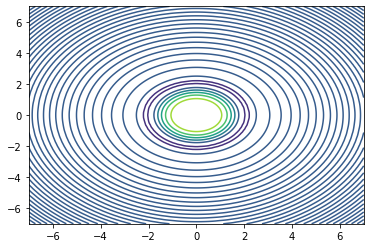

In [8]:
plt.contour(xx, yy , z)

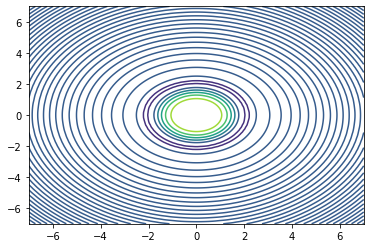

In [9]:
plt.contour(xx, yy , z ) # filled contours 

OneClass SVM 

In [10]:
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X+2 , X- 2]
X_train.shape

(200, 2)

In [11]:
#Following our discussion on meshgrid above.
xx,yy = np.meshgrid(np.linspace(-5, 5, 500) , np.linspace(-5,5,500))

Random datasets Generation

In [12]:
rng = np.random.RandomState(42)    #for reproduction results.
#Genrate train sata
X= 0.3 * rng.randn(100,2)
X_train = np.r_[X + 2, X - 2]
#Generate some regular novel observations
X= 0.3 * rng.randn(20 , 2)
X_test = np.r_[X +2 , X- 2]
#Genrate some abnormal novel observations
X_outliers = rng.uniform(low = -4, high=4, size= (20, 2))


Fit SVM

In [13]:
#fit the model 
clf = svm.OneClassSVM(nu= 0.1 , kernel = "rbf" , gamma =0.1)
clf.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [14]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train ==1 -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

Plot Contours/ Decision Boundaries

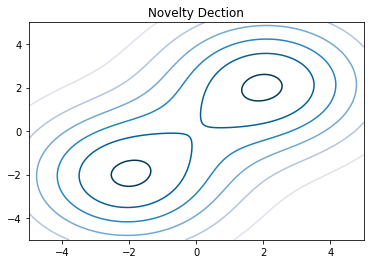

In [15]:
#plot the line , the points and the nearest vectors to the plane

Z = clf.decision_function(np.c_[xx.ravel() , yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Dection")
plt.contour(xx, yy , Z, levels= np.linspace(Z.min() , 0 , 7), cmap=plt.cm.PuBu)
#plt.contour(xx,yy,Z levels=[0] , Linewwidths = 2, colors='darked')
#plt.contourf(xx,yy , Z , Levels= [0, Z.max()] , colors = 'palevioletred')



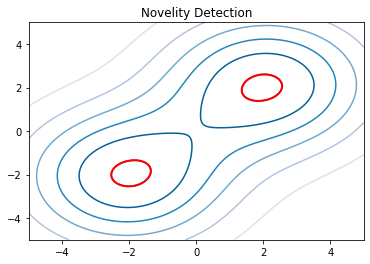

In [16]:
plt.title("Novelity Detection")
plt.contour(xx , yy, Z ,levels = np.linspace(Z.min(), 0, 7) , cmap = plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0] , linewidths= 2 , colors = 'red')

Overlay datapoints 

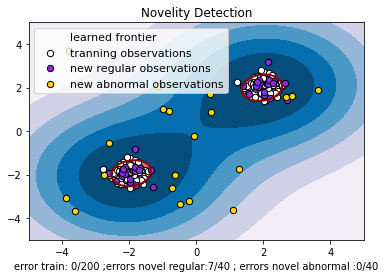

In [17]:
plt.title("Novelity Detection")
plt.contourf(xx, yy, Z, levels = np.linspace(Z.min() , 0,7) , cmap = plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0] , linewidths =2 , colors = 'darkred')
plt.contourf(xx,yy, Z, levels = [0, Z.max()] , colors = 'palevioletred')
s= 40
b1 = plt.scatter(X_train[:,0] , X_train[:, 1] , c= 'white' , s=s , edgecolors = 'k')
b2 = plt.scatter(X_test[:, 0] , X_test[:, 1] , c = 'blueviolet' , s=s, edgecolors = 'k')
c = plt.scatter(X_outliers[: ,0] , X_outliers[:,1] , c='gold' , s=s , edgecolors = 'k')

plt.axis('tight')
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.legend([a.collections[0] , b1, b2, c], 
           ["learned frontier" , "tranning observations",
            "new regular observations" , "new abnormal observations"], 
           loc="upper left", 
           prop = matplotlib.font_manager.FontProperties(size=11)
           )

plt.xlabel(
    "error train: %d/200 ;errors novel regular:%d/40 ; "
    "errors novel abnormal :%d/40"
    %(n_error_train , n_error_test , n_error_outliers)
)
plt.show()

Isolation Forest

Using the same dataset we used for one class SVM

In [18]:
#fit the model IsolationForest

In [21]:
clf = IsolationForest(max_samples = 100 , random_state = rng)
clf.fit(X_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7F34C0C4DD40)

In [24]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

Plot Contour Decision Boundaries

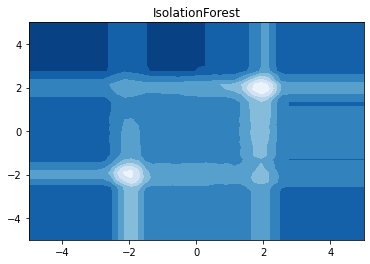

In [26]:
#plot the line , the samples , and the nearest vectors to the plane
xx,yy = np.meshgrid(np.linspace(-5,5,50) , np.linspace(-5,5,50))
Z= clf.decision_function(np.c_[xx.ravel() , yy.ravel()])
Z= Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx , yy , Z , cmap=plt.cm.Blues_r)

Overrelay datapoints

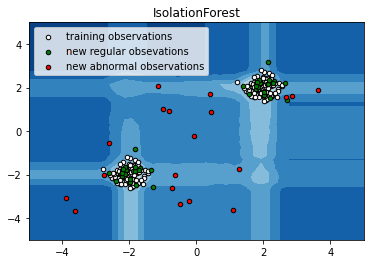

In [28]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z , cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[: , 0] , X_train[:,1] , c ='white', s=20 , edgecolor = 'k')
b2 = plt.scatter(X_test[:,0] , X_test[:,1] , c='green', s= 20 , edgecolor = 'k')
c= plt.scatter(X_outliers[:,0] , X_outliers[:, 1] , c='red' , s= 20 , edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5 , 5))
plt.legend([b1,b2,c] , 
           ["training observations" , 
            "new regular obsevations", "new abnormal observations"], 
           loc= "upper left"
           )
plt.show()